# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats.stats import pearsonr
import os
from pylab import rcParams
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# read in readmissions data provided
os.chdir('/home/roman/Documents/Projects/Springboard/8.3 EDA/EDA_hospital_readmit/data')
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

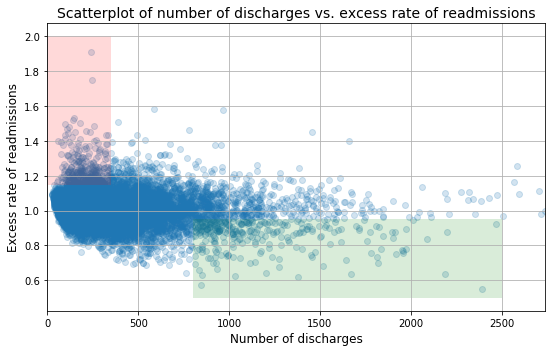

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### 1. Setup an appropriate hypothesis test.
 - H_0: no correlation between x (Number of Discharges) and y (Excess rate of readmissions)
 - H_A: negative correlation between x and y (higher number of discharges ~ lower excess rate of readmissions)

#### A. Do you agree with the above analysis and recommendations? Why or why not?

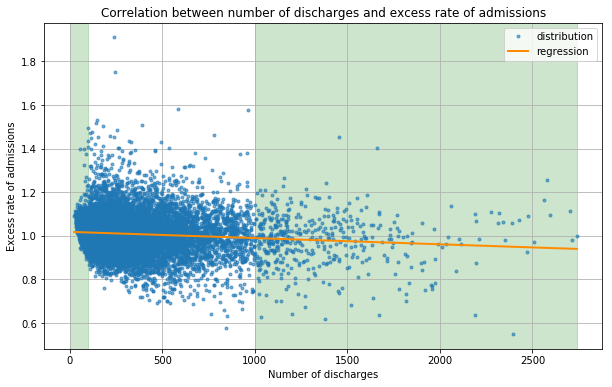

Correlaion between number of discharges and excess rate of admissions: -0.093
CI correlation for H_0 with alpha = 0.01: [-0.02319175  0.0239654 ]
Permutation test: P-value for no negative correlation: 0.0
Statistical test: P-value for no negative correlation: 7.511378213232263e-24

Mean excess readm. rate for hospitals with <100 discharges: 1.02
Ratio of excess readm. rate > 1 for hospitals with <100 discharges: 0.63
Mean excess readm. rate for hospitals with >1000 discharges: 0.98
Ratio of excess readm. rate > 1 for hospitals with >1000 discharges: 0.44
Percentage of hospitals with <100 discharges: 10.96
Percentage of hospitals with >1000 discharges: 4.0


In [5]:
# Plot relationship between number of discharges and excess rate of admissions:
a, b = np.polyfit(x, y, deg=1)
x_reg = np.array(x)
y_reg = a * x_reg + b
rcParams['figure.figsize'] = 10, 6
plt.plot(x, y, marker = '.', linestyle='none', alpha=0.6)
plt.plot(x_reg, y_reg, color='darkorange', linewidth=2)
plt.axvspan(0, 100, alpha=0.2, color='green')
plt.axvspan(1000, max(x), alpha=0.2, color='green')
plt.grid()
plt.legend(['distribution', 'regression'])
plt.title('Correlation between number of discharges and excess rate of admissions')
plt.xlabel('Number of discharges')
plt.ylabel('Excess rate of admissions')
plt.show()
# Calculate statisitcs
corr_xy = np.corrcoef(x, y)[0, 1]
n = 10000
corr_perm = np.empty(n)
for i in range(n):
    x_perm = np.random.permutation(x)
    y_perm = np.random.permutation(y)
    corr_perm[i] = np.corrcoef(x_perm, y_perm)[0, 1]
p_perm = sum(corr_perm < corr_xy) / corr_perm.shape[0]
p_stat = pearsonr(x,y)[1] / 2 # <- divide by two for one sided p-value
print('Correlaion between number of discharges and excess rate of admissions: ' + str(round(corr_xy, 3)))
print('CI correlation for H_0 with alpha = 0.01: ' + str(np.percentile(corr_perm, [0.5, 99.5])))
print('Permutation test: P-value for no negative correlation: ' + str(p_perm))
print('Statistical test: P-value for no negative correlation: ' + str(p_stat) + '\n')
df_few_disc = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
mean_few_disc = df_few_disc['Excess Readmission Ratio'].mean()
perc_few_disc = sum(df_few_disc['Excess Readmission Ratio'] > 1) / \
    len(df_few_disc['Excess Readmission Ratio'].dropna())
print('Mean excess readm. rate for hospitals with <100 discharges: ' + str(round(mean_few_disc, 2)))
print('Ratio of excess readm. rate > 1 for hospitals with <100 discharges: ' + str(round(perc_few_disc, 2)))
df_many_disc = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
mean_many_disc = df_many_disc['Excess Readmission Ratio'].mean()
perc_many_disc = sum(df_many_disc['Excess Readmission Ratio'] > 1) / \
    len(df_many_disc['Excess Readmission Ratio'].dropna())
print('Mean excess readm. rate for hospitals with >1000 discharges: ' + str(round(mean_many_disc, 2)))
print('Ratio of excess readm. rate > 1 for hospitals with >1000 discharges: ' + str(round(perc_many_disc, 2)))
print('Percentage of hospitals with <100 discharges: ' + str(round(100 * len(df_few_disc) / \
    clean_hospital_read_df['Number of Discharges'].dropna().shape[0], 2)))
print('Percentage of hospitals with >1000 discharges: ' + str(round(100 * len(df_many_disc) / \
    clean_hospital_read_df['Number of Discharges'].dropna().shape[0], 2)))

The facts reported by the preliminary analysis are correct. A permutation and a statistical pearson correlation test show that the null hypothesis (no correlation between number of discharges and exess rate of admissions) must be rejected. The number of discharges is statistically significant negatively correlated with the excess rate of admissions. Also the reported mean excess rate of admission for hospitals with less than 100 and more than 1000 discharges are accurate.

The narrative of the negative correlation between number of discharges excess rate of admissions is however somewhat misleading. Even though the correlation is statistically significant, this correlation is not very strong (<0.1). The low correlation is also apparent through the linear regression line which is almost horizontal.

While it is also true that hospitals with less than 100 dicharges have a higher mean excess readmission ratio than hospitals with more than 1000 discharges, this statement does not mention the fact that less than 11% of all hospitals have less than 100 discharges and only 4% of the hospitals have more than 1000 discharges. (Those two areas have been highlighted green in the plot above)

The analysis concludes that "smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions." Since it is reasonable to assume that the number of discharges is related to the size of a hospital, the conclusion that small hospitals might be lacking necessary resources to prevent complications that lead to readmissions cannot be supported by statistical evidence.

#### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

The plot under A showed several outliers with a very high excess rate of admissions. First, I am checking if the correlation found between number of discharges and excess rate for admission still holds when disreagarding outliers and only considering the mean 95% in terms of admission excess rate.

Correlation between number of discharges and excess rate of admissions - no outliers: -0.02901


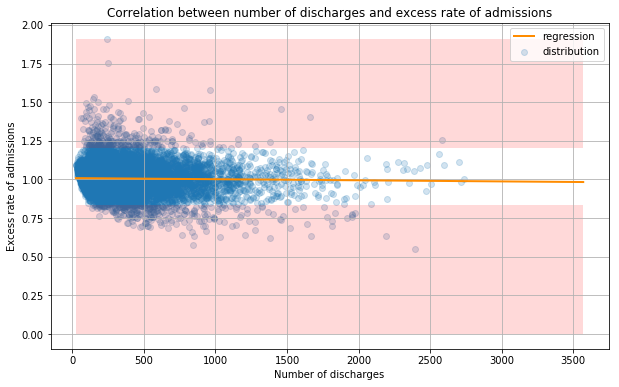

In [6]:
# Plot relationship between number of discharges and excess rate of admissions:
p = np.percentile(y, [2.5, 97.5])
no_outliers = clean_hospital_read_df[(clean_hospital_read_df['Excess Readmission Ratio'] > p[0]) \
    & (clean_hospital_read_df['Excess Readmission Ratio'] < p[1])]
x_no_outliers = no_outliers['Number of Discharges']
y_no_outliers = no_outliers['Excess Readmission Ratio']
a, b = np.polyfit(x_no_outliers, y_no_outliers, deg=1)
x_reg = np.array(x_no_outliers)
y_reg = a * x_reg + b
fig, ax = plt.subplots()
ax.scatter(x, y,alpha=0.2)
ax.fill_between([min(x_reg),max(x_reg)], 0, p[0], facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([min(x_reg),max(x_reg)], p[1], max(y), facecolor='red', alpha = .15, interpolate=True)
rcParams['figure.figsize'] = 10, 6
ax.plot(x_reg, y_reg, color='darkorange', linewidth=2)
ax.grid()
ax.legend(['regression', 'distribution'])
ax.set_title('Correlation between number of discharges and excess rate of admissions')
ax.set_xlabel('Number of discharges')
ax.set_ylabel('Excess rate of admissions')
fig.show()
corr_xy = np.corrcoef(x_no_outliers, y_no_outliers)[0, 1]
print('Correlation between number of discharges and excess rate of admissions - no outliers: ' + \
      str(round(corr_xy, 5)))

It turns out that the top and bottom 2.5% of most extreme excess readmission ratios are largely responsible for the negative correlation that was previously discovered. When only considering the middle 95% of excess readmission rates the correlation further apporoaches the horizontal line. The plot shows that an excess readmission ratio is only an issue for a small portion of hospitals. Even though these hospitals tend to be the smaller ones, the problem shouldn't be generalized to all smaller hospitals.

Next we want to see how each of the two factors contributing to the excess readmission rate - predicted readmission rate and expected readmission rate - are correlated with the number of discharges.

In [ ]:
x = clean_hospital_read_df['Number of Discharges']
y = clean_hospital_read_df['Expected Readmission Rate']
rcParams['figure.figsize'] = 12, 5
plt.subplot(1, 2, 1)
plt.plot(x, y, marker='.', linestyle='none', alpha=0.2)
plt.annotate('Group B', xy=(3000, 23), xytext=(4300, 25), \
    arrowprops=dict(facecolor='black', shrink=0.05, width=1),)
plt.annotate('Group A', xy=(3000, 6), xytext=(4300, 8), \
    arrowprops=dict(facecolor='black', shrink=0.05, width=1),)
plt.grid()
plt.title('Expected readmission rate vs number of discharges')
plt.xlabel('Number of discharges')
plt.ylabel('Expected readmission rate')
x = clean_hospital_read_df['Number of Discharges']
y = clean_hospital_read_df['Predicted Readmission Rate']
plt.subplot(1, 2, 2)
plt.plot(x, y, marker='.', linestyle='none', alpha=0.2)
plt.annotate('Group B', xy=(3000, 23), xytext=(4300, 25), \
    arrowprops=dict(facecolor='black', shrink=0.05, width=1),)
plt.annotate('Group A', xy=(3000, 6), xytext=(4300, 8), \
    arrowprops=dict(facecolor='black', shrink=0.05, width=1),)
plt.grid()
plt.title('Predicted readmission rate vs number of discharges')
plt.xlabel('Number of discharges')
plt.ylabel('Predicted readmission rate')
plt.show()

Clearly two clusters emerge: Hospitals with an expected readmission rate of less than 10 (Group A) and hospitals with an expected readmission rate of more than 10 (Grup B). In the following, we will investigate these two groups separately.

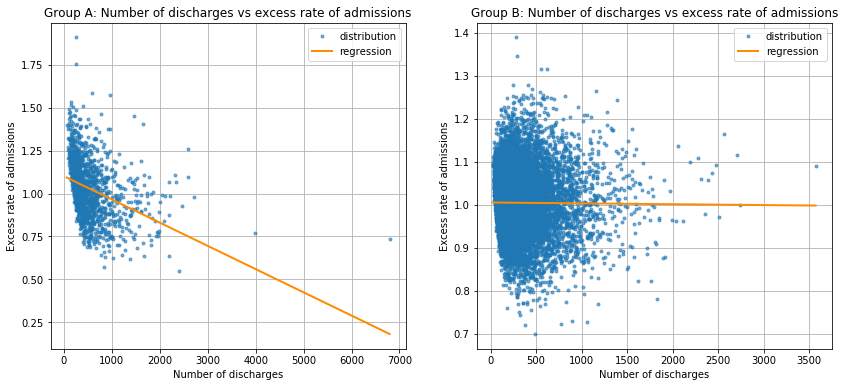

In [7]:
df_A = clean_hospital_read_df[clean_hospital_read_df['Expected Readmission Rate'] <= 10]
df_B = clean_hospital_read_df[clean_hospital_read_df['Expected Readmission Rate'] > 10]
x_A = list(df_A['Number of Discharges'])
y_A = list(df_A['Excess Readmission Ratio'])
a, b = np.polyfit(x_A, y_A, deg=1)
x_reg_A = np.array(x_A)
y_reg_A = a * x_reg_A + b
x_B = list(df_B['Number of Discharges'])
y_B = list(df_B['Excess Readmission Ratio'])
a, b = np.polyfit(x_B, y_B, deg=1)
x_reg_B = np.array(x_B)
y_reg_B = a * x_reg_B + b
rcParams['figure.figsize'] = 14, 6
plt.subplot(1, 2, 1)
plt.plot(x_A, y_A, marker = '.', linestyle='none', alpha=0.6)
plt.plot(x_reg_A, y_reg_A, color='darkorange', linewidth=2)
plt.grid()
plt.legend(['distribution', 'regression'])
plt.title('Group A: Number of discharges vs excess rate of admissions')
plt.xlabel('Number of discharges')
plt.ylabel('Excess rate of admissions')
plt.subplot(1, 2, 2)
plt.plot(x_B, y_B, marker = '.', linestyle='none', alpha=0.6)
plt.plot(x_reg_B, y_reg_B, color='darkorange', linewidth=2)
plt.grid()
plt.legend(['distribution', 'regression'])
plt.title('Group B: Number of discharges vs excess rate of admissions')
plt.xlabel('Number of discharges')
plt.ylabel('Excess rate of admissions')
plt.show()

Interestingly, there seems to be a strong correlation in group A between number of discharges and excess rate of admissions but almost no such correlation for group B. We therefore conclude that for hospitals with an expected readmission rate of more than 10, there is no evidence that smaller hospitals are more likely to have a higher excess rate of admissions.

Next we check the extend and significance of the correlation found in group A

In [8]:
# Calculate statisitcs
corr_xy_A = np.corrcoef(x_A, y_A)[0, 1]
n = 10000
corr_perm = np.empty(n)
for i in range(n):
    x_perm = np.random.permutation(x_A)
    y_perm = np.random.permutation(y_A)
    corr_perm[i] = np.corrcoef(x_perm, y_perm)[0, 1]
p_perm = sum(corr_perm < corr_xy_A) / corr_perm.shape[0]
p_stat = pearsonr(x_A, y_A)[1] / 2 # <- divide by two for one sided p-value
print('Group A: Statisitcs for correlation between number of discharges and excess rate of admissions')
print('Correlaion between number of discharges and excess rate of admissions: ' + str(round(corr_xy_A, 3)))
print('CI correlation for H_0 with alpha = 0.01: ' + str(np.percentile(corr_perm, [0.5, 99.5])))
print('Permutation test: P-value for no negative correlation: ' + str(p_perm))
print('Statistical test: P-value for no negative correlation: ' + str(p_stat) + '\n')

Group A: Statisitcs for correlation between number of discharges and excess rate of admissions
Correlaion between number of discharges and excess rate of admissions: -0.35
CI correlation for H_0 with alpha = 0.01: [-0.06883659  0.06966925]
Permutation test: P-value for no negative correlation: 0.0
Statistical test: P-value for no negative correlation: 3.892483421160941e-41



We conducted the following hypothesis test:
- H_0: no correlation between between x (number of discharges) and y (excess rate of admissions) for Group A
- H_A: negaitve correlation between x and y

The correlation is -0.35 and lies outside the 99% confidence interval (alpha = 0.01). The null hypothesis can therefore be rejected. For group A there is a relatively strong statistically significant correlation between number of discharges and excess admission ratio. 


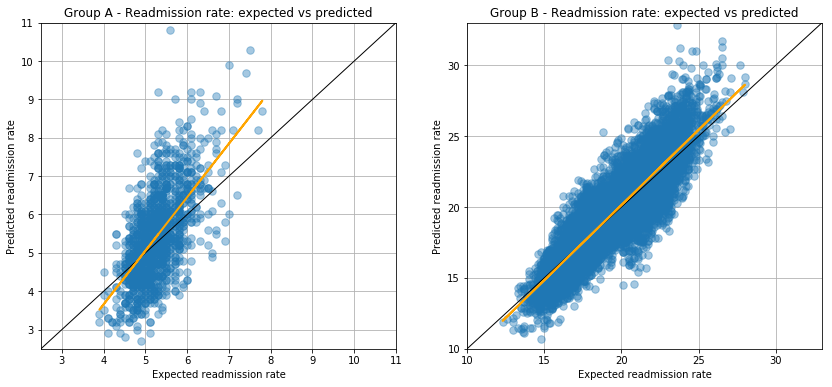

Group A - Standard deviation excess readmission ratio: 0.17
Group B - Standard deviation excess readmission ratio: 0.075


In [9]:
# Compare expected and predicted readmission rate for both groups
x_A = list(df_A['Expected Readmission Rate'])
y_A = list(df_A['Predicted Readmission Rate'])
a, b = np.polyfit(x_A, y_A, deg=1)
x_reg_A = np.array(x_A)
y_reg_A = a * x_reg_A + b
x_B = list(df_B['Expected Readmission Rate'])
y_B = list(df_B['Predicted Readmission Rate'])
a, b = np.polyfit(x_B, y_B, deg=1)
x_reg_B = np.array(x_B)
y_reg_B = a * x_reg_B + b
plt.subplot(1, 2, 1)
plt.plot(x_A, y_A, marker='.', markersize=15, alpha=0.4, linestyle='none')
plt.plot([2.5, 11], [2.5, 11], color='black', linewidth=1)
plt.plot(x_reg_A, y_reg_A, color='orange', linewidth=2)
plt.xlim(2.5,11)
plt.ylim(2.5,11)
plt.grid()
plt.title('Group A - Readmission rate: expected vs predicted')
plt.xlabel('Expected readmission rate')
plt.ylabel('Predicted readmission rate')
plt.subplot(1, 2, 2)
plt.plot(x_B, y_B, marker='.', markersize=15, alpha=0.4, linestyle='none')
plt.plot([10, 33], [10, 33], color='black', linewidth=1)
plt.plot(x_reg_B, y_reg_B, color='orange', linewidth=2)
plt.xlim(10,33)
plt.ylim(10,33)
plt.grid()
plt.title('Group B - Readmission rate: expected vs predicted')
plt.xlabel('Expected readmission rate')
plt.ylabel('Predicted readmission rate')
plt.show()
std_A = np.std(df_A['Excess Readmission Ratio'])
std_B = np.std(df_B['Excess Readmission Ratio'])
print('Group A - Standard deviation excess readmission ratio: ' + str(round(std_A, 3)))
print('Group B - Standard deviation excess readmission ratio: ' + str(round(std_B, 3)))

The plots above show, that not only does group A tend to predict more readmissions than expected (orange regression line is steeper than y=x) , but also the standard deviation for the excess readmission ratio is much higher in group A (0.17) than in group B (0.075). This leads to the conclusion that the estimation for expected readmission rate is worse for group A than for group B.

#### Conclusion
The analysis showed that the negative correlation between number of discharges and excess readmission ratio is only an issue for a subgroup of hospitals consisting of the hospitals with an expected readmission rate of less than 10. When drawing conlusions regarding actions that certain hospitals should take, it is therefore important to not only look at the hospital size but also at their expected readmission rate.

Furthermore, it is important to note that the expected readmission rate is not a very accurate estimator for hospitals with readmission rates of less than 10. Therefore it should be considered to take a deeper look at the formula to calculate the expected readmission rate for this grouop.